#### Possible Hypothesis:
#### - Travel Time
#### - Seasonal Effects
#### - Nights
#### - Days
#### - Long Ride vs Short Ride Occurrences
#### - Popularity between Green, Yellow, and For-Hire
#### - 3D Map / Heatmap
#### - Payment and effects on types of trips

### How

In [31]:
#Loading Data Tool Packages
import pandas as pd
import numpy as np

#Packages for plotting
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#statistical packages
import scipy.stats

#Packages for datetime conversions
import time
from datetime import datetime as dt
from datetime import timedelta as td

#Find longitude and latitude
from geopy.geocoders import Nominatim

In [34]:
#Implementing Possible Latitude and Longitude into CSV
geolocator = Nominatim(user_agent="geoapiExercises")
ladd1 = "Newark Airport"
print("Location address:",ladd1)
location = geolocator.geocode(ladd1)

Location address: Newark Airport


In [2]:
fhv_data = pd.read_csv('fhv_tripdata_2019-12.csv')
fhv_data = pd.DataFrame(fhv_data)
#fhvhv_data = pd.read_csv('fhvhv_tripdata_2019-12.csv')
green_data = pd.read_csv('green_tripdata_2019-12.csv')

C:\Users\chappie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
yellow_data = pd.read_csv('yellow_tripdata_2019-12.csv')
yellow_data.head(5)

C:\Users\chappie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [4]:
taxi_zones = pd.read_csv('taxi_zones.csv', index_col='LocationID')
taxi_zones_id = pd.read_csv('taxi_zones_id.csv', index_col='LocationID')
taxi_zones = taxi_zones.drop(['OBJECTID','X','Y','Shape_Leng','Shape_Area'], axis = 1)
print(taxi_zones_id.head(5))
#Extracting Zones into Dictionary
LocationIDtoZoneArray = taxi_zones_id.Zone
LocationIDtoZone = {}
LocationIDtoBorough = {}
def mappingColumnDict(column, dictionary):
    length = 0
    for time in column:
        length +=1
        if time not in dictionary:
            dictionary[time] = length
mappingColumnDict(taxi_zones_id.Zone, LocationIDtoZone)
mappingColumnDict(taxi_zones_id.Borough,LocationIDtoBorough)

                  Borough                     Zone service_zone
LocationID                                                     
1                     EWR           Newark Airport          EWR
2                  Queens              Jamaica Bay    Boro Zone
3                   Bronx  Allerton/Pelham Gardens    Boro Zone
4               Manhattan            Alphabet City  Yellow Zone
5           Staten Island            Arden Heights    Boro Zone


In [5]:
taxi_zones_id = pd.read_csv('taxi_zones_id.csv')


#Extracting Zones into Dictionary
LocationIDtoZoneArray = taxi_zones_id.Zone
LocationIDtoZone = {}
LocationIDtoBorough = {}
def mappingColumnDict(column, dictionary):
    length = 0
    for time in column:
        length +=1
        if time not in dictionary:
            dictionary[time] = length
mappingColumnDict(taxi_zones_id.Zone, LocationIDtoZone)
mappingColumnDict(taxi_zones_id.Borough,LocationIDtoBorough)

LocationIDtoZone = dict([(value, key) for key, value in LocationIDtoZone.items()]) 
LocationIDtoBorough = dict([(value, key) for key, value in LocationIDtoBorough.items()]) 

In [6]:
fhv_data['Zone'] = fhv_data.PULocationID.map(LocationIDtoZone)
#fhv_data['Borough'] = fhv_data.PULocationID.map(LocationIDtoBorough)
fhv_data.head(5)

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Zone
0,B00009,2019-12-01 00:47:00,2019-12-01 00:52:00,264,264,NaN,NV
1,B00009,2019-12-01 00:27:00,2019-12-01 00:44:00,264,264,NaN,NV
2,B00014,2019-12-01 00:42:18,2019-12-01 01:31:31,264,264,NaN,NV
3,B00014,2019-12-01 00:43:08,2019-12-01 01:07:38,264,264,NaN,NV
4,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56,56,NaN,Corona


### For-Hire Vehicle ("FHV") trip records in December 2019

In [7]:
print(fhv_data.SR_Flag.isna().sum())
fhv_data = fhv_data.drop(['SR_Flag'], axis = 1)
fhv_data.head(5)

1759399


,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,Zone
0,B00009,2019-12-01 00:47:00,2019-12-01 00:52:00,264,264,NV
1,B00009,2019-12-01 00:27:00,2019-12-01 00:44:00,264,264,NV
2,B00014,2019-12-01 00:42:18,2019-12-01 01:31:31,264,264,NV
3,B00014,2019-12-01 00:43:08,2019-12-01 01:07:38,264,264,NV
4,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56,56,Corona


In [8]:
fhv_data.pickup_datetime = pd.to_datetime(fhv_data.pickup_datetime)
fhv_data.dropoff_datetime = pd.to_datetime(fhv_data.dropoff_datetime)
fhv_data['time_of_ride'] = fhv_data.dropoff_datetime - fhv_data.pickup_datetime
#fhv_data['pickup_month'] = fhv_data.pickup_datetime.dt.month
fhv_data['pickup_day'] = fhv_data.pickup_datetime.dt.day
fhv_data['pickup_hour'] = fhv_data.pickup_datetime.dt.hour
fhv_data['dropoff_day'] = fhv_data.dropoff_datetime.dt.day
fhv_data['dropoff_hour'] = fhv_data.dropoff_datetime.dt.hour
time_of_ride_seconds = []
for i in fhv_data['time_of_ride']:
    time_of_ride_seconds.append(td.total_seconds(i)/60)
fhv_data['time_of_ride_minutes'] = time_of_ride_seconds
fhv_data.head(5)

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,Zone,time_of_ride,pickup_day,pickup_hour,dropoff_day,dropoff_hour,time_of_ride_minutes
0,B00009,2019-12-01 00:47:00,2019-12-01 00:52:00,264,264,NV,00:05:00,1,0,1,0,5.000000
1,B00009,2019-12-01 00:27:00,2019-12-01 00:44:00,264,264,NV,00:17:00,1,0,1,0,17.000000
2,B00014,2019-12-01 00:42:18,2019-12-01 01:31:31,264,264,NV,00:49:13,1,0,1,1,49.216667
3,B00014,2019-12-01 00:43:08,2019-12-01 01:07:38,264,264,NV,00:24:30,1,0,1,1,24.500000
4,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56,56,Corona,00:07:20,1,0,1,0,7.333333


{'NV': 1385513, 'Corona': 7141, 'Elmhurst': 6207, 'Flushing Meadows-Corona Park': 321, 'North Corona': 7058, 'Elmhurst/Maspeth': 1915, 'Times Sq/Theatre District': 4464, 'East Elmhurst': 3953, 'Hunts Point': 771, 'LaGuardia Airport': 5484, 'JFK Airport': 6565, 'Woodlawn/Wakefield': 2604, 'Auburndale': 695, 'Rego Park': 1363, 'Woodside': 2553, 'Clinton West': 814, 'Crown Heights North': 2961, 'Saint George/New Brighton': 9316, 'Stapleton': 3814, 'West Brighton': 1644, 'South Beach/Dongan Hills': 965, 'Jackson Heights': 10710, 'Rossville/Woodrow': 658, 'Charleston/Tottenville': 2338, 'East Flatbush/Remsen Village': 1858, 'Midtown North': 2492, 'Midtown Center': 4963, 'Canarsie': 1991, 'Garment District': 1452, nan: 9247, 'Astoria': 9121, 'Brownsville': 1577, 'Ridgewood': 5869, 'Bensonhurst East': 1507, 'Sunset Park East': 3621, 'South Ozone Park': 2290, 'Queensbridge/Ravenswood': 2801, 'Long Island City/Queens Plaza': 1623, 'Manhattan Beach': 755, 'Maspeth': 1970, 'Sunnyside': 1910, 'Flu

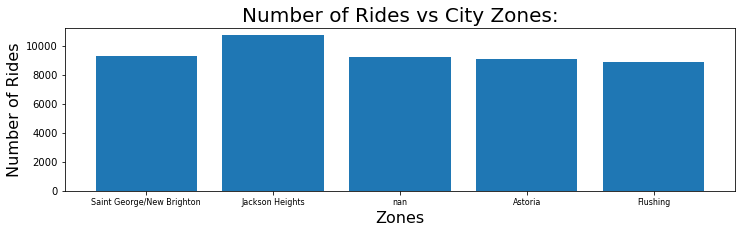

In [25]:
def graphZone(column):
    ZoneDictionary = {}
    for time in column:
        if time not in ZoneDictionary:
            ZoneDictionary[time] = 1
        else:
            ZoneDictionary[time] += 1
    #'NV': 1385513 (Too Large)
    print(ZoneDictionary,"\n")
    del ZoneDictionary['NV']
    #del ZoneDictionary['nan']
    ZoneDictionary = dict((key, value) for key, value in ZoneDictionary.items() if value > 8000)
    print("Top5:", ZoneDictionary)
    names = list(ZoneDictionary.keys())
    values = list(ZoneDictionary.values())
    plt.figure(figsize=(12,3))
    plt.bar(range(len(ZoneDictionary)), values, tick_label=names)
    plt.title('Number of Rides vs City Zones:', fontsize=20)
    plt.xlabel('Zones', fontsize=16)
    plt.ylabel('Number of Rides', fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.xticks(rotation=0)
    

graphZone(fhv_data.Zone)



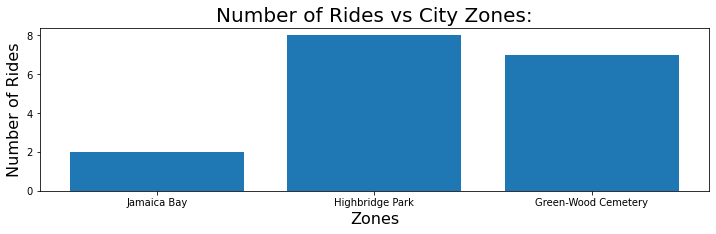

In [10]:
def graphZone(column):
    ZoneDictionary = {}
    for time in column:
        if time not in ZoneDictionary:
            ZoneDictionary[time] = 1
        else:
            ZoneDictionary[time] += 1
    #'NV': 1385513 (Too Large)
    del ZoneDictionary['NV']
    #del ZoneDictionary['nan']
    ZoneDictionary = dict((key, value) for key, value in ZoneDictionary.items() if value < 10)
    #print(ZoneDictionary)
    names = list(ZoneDictionary.keys())
    values = list(ZoneDictionary.values())
    plt.figure(figsize=(12,3))
    plt.bar(range(len(ZoneDictionary)), values, tick_label=names)
    plt.title('Number of Rides vs City Zones:', fontsize=20)
    plt.xlabel('Zones', fontsize=16)
    plt.ylabel('Number of Rides', fontsize=16)
    plt.rc('xtick',labelsize=10)
    plt.xticks(rotation=0)
    

graphZone(fhv_data.Zone)

In [11]:
#Using Calendar to input days.
import calendar
fhv_weekday = []
for i in fhv_data.pickup_datetime:
    weekday = calendar.weekday(i.year, i.month, i.day)
    if weekday == 0:
        fhv_weekday.append("Monday")
    elif weekday == 1:
        fhv_weekday.append("Tuesday")
    elif weekday == 2:
        fhv_weekday.append("Wednesday")
    elif weekday == 3:
        fhv_weekday.append("Thursday")
    elif weekday == 4:
        fhv_weekday.append("Friday")
    elif weekday == 5:
        fhv_weekday.append("Saturday")
    elif weekday == 6:
        fhv_weekday.append("Sunday")
fhv_data['pickup_weekday'] = fhv_weekday

{'Sunday': 213480, 'Monday': 303794, 'Tuesday': 302389, 'Wednesday': 239799, 'Thursday': 254842, 'Friday': 251131, 'Saturday': 193964}


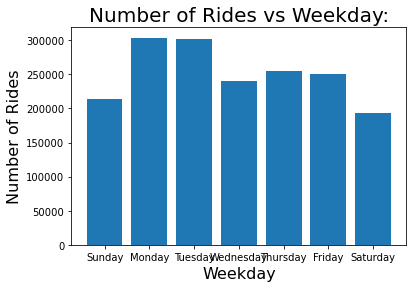

In [12]:
def graphWeekday(column):
    MinutesDictionary = {}
    for time in column:
        if time not in MinutesDictionary:
            MinutesDictionary[time] = 1
        else:
            MinutesDictionary[time] += 1
    print(MinutesDictionary)
    plt.bar(*zip(*MinutesDictionary.items()))
    plt.title('Number of Rides vs Weekday:', fontsize=20)
    plt.xlabel('Weekday', fontsize=16)
    plt.ylabel('Number of Rides', fontsize=16)
    plt.rc('xtick',labelsize=8)
    #plt.savefig('Initial Time Range and Number of Rides',dpi = 300, quality =100)
    plt.show()

graphWeekday(fhv_data.pickup_weekday)

In [13]:
def graphRideByLocation(column):
    MinutesDictionary = {}
    for time in column:
        if time not in MinutesDictionary and time != '264':
            MinutesDictionary[time] = 1
        else:
            MinutesDictionary[time] += 1
    #print(MinutesDictionary)
    #MinutesDictionary.pop('264',None)
    del MinutesDictionary[264]
    print(MinutesDictionary)
    plt.bar(*zip(*MinutesDictionary.items()))
    plt.title('Number of Rides in Location:')
    plt.xlabel('Location ID')
    plt.ylabel('Number of Rides')
    #plt.savefig('Initial Time Range and Number of Rides',dpi = 300, quality =100)
    plt.show()



{56: 7141, 82: 6207, 93: 321, 173: 7058, 83: 1915, 230: 4464, 70: 3953, 126: 771, 138: 5484, 132: 6565, 259: 2604, 9: 695, 196: 1363, 260: 2553, 50: 814, 61: 2961, 206: 9316, 221: 3814, 245: 1644, 214: 965, 129: 10710, 204: 658, 44: 2338, 72: 1858, 163: 2492, 161: 4963, 39: 1991, 100: 1452, 265: 8962, 7: 9121, 35: 1577, 198: 5869, 21: 1507, 227: 3621, 216: 2290, 193: 2801, 146: 1623, 150: 755, 157: 1970, 226: 1910, 92: 8906, 192: 1473, 73: 1102, 171: 2140, 156: 2189, 187: 1811, 102: 2401, 36: 3162, 145: 1012, 1: 1918, 45: 958, 10: 1008, 218: 487, 26: 1480, 189: 262, 223: 5484, 179: 5750, 229: 2134, 263: 803, 153: 144, 184: 81, 16: 1539, 252: 2413, 88: 1770, 225: 1154, 115: 653, 22: 2093, 180: 270, 29: 2290, 37: 1760, 233: 1342, 144: 1051, 215: 939, 237: 2343, 49: 569, 57: 283, 188: 2072, 202: 443, 53: 939, 48: 2937, 79: 976, 113: 541, 13: 2500, 51: 1198, 46: 64, 162: 5266, 3: 723, 85: 524, 176: 413, 236: 1816, 89: 2015, 11: 877, 155: 893, 67: 698, 251: 1221, 63: 773, 166: 550, 71: 1241

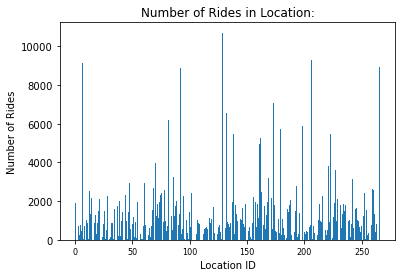

In [14]:
graphRideByLocation(fhv_data.PULocationID)

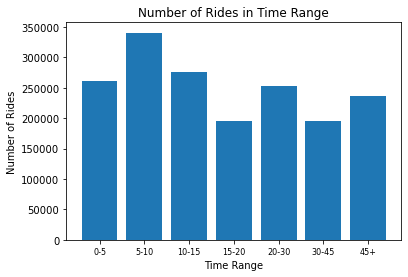

In [15]:
#Minutes Dictionary
# '0-5','5-10','10-15','15-20','20-30','30-45','45+'
ArrayZerotoFive=[]
ArrayFivetoTen=[]
ArrayTentoFifteen=[]
ArrayFifteentoTwenty=[]
ArrayTwentytoThirty=[]
ArrayThirtytoFortyFive=[]
ArrayFortyFivePlus=[]
MinutesDictionary = {'0-5':0,'5-10':0,'10-15':0,'15-20':0,'20-30':0,'30-45':0,'45+':0}
stepcount = 0 
for time in fhv_data.time_of_ride_minutes:
    def dict_call(time):
        if time not in MinutesDictionary:
            MinutesDictionary[time] = 1
        else:
            MinutesDictionary[time] += 1
    time = round(time, 0)
    stepcount += 1
    if time <= 5:
        ArrayZerotoFive.append(stepcount)
        time = '0-5'
        dict_call(time)
    elif time <= 10:
        time = '5-10'
        dict_call(time)
        ArrayFivetoTen.append(stepcount)
    elif time <= 15:
        time = '10-15'
        dict_call(time)
        ArrayTentoFifteen.append(stepcount)
    elif time <= 20:
        time = '15-20'
        dict_call(time)
        ArrayFifteentoTwenty.append(stepcount)
    elif time <= 30:
        time = '20-30'
        dict_call(time)
        ArrayTwentytoThirty.append(stepcount)
    elif time <= 45:
        time = '30-45'
        dict_call(time)
        ArrayThirtytoFortyFive.append(stepcount)
    else:
        time = '45+'
        dict_call(time)
        ArrayFortyFivePlus.append(stepcount)

#print(ArrayZerotoFive)
#print(MinutesDictionary)
plt.bar(*zip(*MinutesDictionary.items()))
plt.title('Number of Rides in Time Range')
plt.xlabel('Time Range')
plt.ylabel('Number of Rides')
#plt.savefig('Initial Time Range and Number of Rides',dpi = 300, quality =100)
plt.show()

{56: 510, 221: 1096, 245: 354, 204: 159, 173: 385, 260: 116, 21: 81, 227: 276, 216: 166, 82: 467, 150: 54, 83: 124, 92: 3266, 73: 331, 171: 552, 156: 304, 45: 252, 132: 440, 223: 558, 7: 649, 259: 672, 61: 459, 206: 2762, 265: 621, 145: 71, 102: 125, 144: 207, 179: 607, 184: 12, 16: 322, 49: 58, 129: 702, 202: 30, 192: 442, 53: 260, 79: 75, 46: 3, 89: 102, 251: 145, 161: 281, 198: 236, 230: 223, 72: 225, 93: 63, 187: 231, 236: 141, 247: 125, 241: 132, 69: 370, 188: 227, 57: 22, 91: 122, 86: 192, 118: 120, 109: 142, 84: 261, 146: 115, 233: 98, 23: 146, 130: 101, 15: 508, 239: 100, 149: 164, 113: 41, 254: 175, 14: 105, 95: 247, 36: 95, 215: 49, 258: 67, 210: 174, 252: 529, 116: 42, 22: 120, 44: 529, 50: 47, 205: 42, 162: 869, 229: 432, 117: 48, 177: 85, 62: 89, 5: 114, 196: 127, 11: 61, 176: 61, 175: 94, 147: 84, 76: 118, 169: 639, 28: 29, 249: 32, 238: 68, 70: 232, 222: 54, 163: 149, 67: 64, 121: 263, 74: 182, 231: 123, 4: 22, 193: 165, 155: 70, 71: 153, 138: 315, 237: 219, 172: 99, 39:

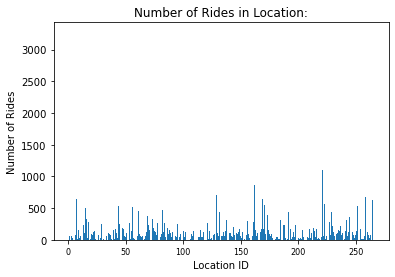

{61: 2540, 188: 1572, 71: 1104, 177: 1392, 37: 1894, 14: 3739, 228: 2766, 67: 946, 170: 375, 229: 216, 56: 1291, 212: 2591, 213: 3583, 78: 3046, 47: 2681, 20: 1836, 24: 168, 218: 174, 82: 2443, 18: 3252, 254: 1853, 42: 2611, 174: 2353, 235: 3216, 119: 2547, 31: 818, 265: 4272, 21: 1009, 115: 205, 206: 2079, 187: 268, 247: 3270, 258: 2951, 96: 396, 63: 3170, 76: 9830, 173: 1638, 39: 1826, 77: 2360, 210: 668, 35: 2963, 91: 876, 249: 90, 215: 947, 10: 497, 196: 563, 197: 3788, 130: 3891, 216: 2577, 95: 1074, 160: 305, 17: 2104, 244: 4397, 243: 3328, 241: 1994, 225: 1091, 251: 380, 180: 1079, 126: 2886, 242: 3042, 136: 1881, 248: 2363, 116: 1300, 127: 2088, 240: 334, 169: 4407, 69: 4281, 120: 339, 147: 1451, 250: 2034, 32: 1144, 259: 1161, 74: 2162, 256: 779, 217: 2547, 66: 121, 26: 2163, 133: 371, 203: 68, 220: 784, 94: 1536, 41: 1113, 168: 3167, 208: 1296, 60: 1811, 40: 127, 191: 320, 227: 1598, 121: 642, 36: 1441, 139: 57, 22: 1650, 28: 1223, 122: 206, 205: 323, 131: 361, 55: 622, 129: 

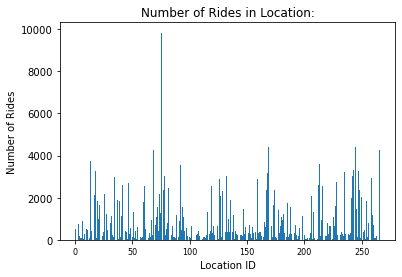

{95: 1362, 91: 961, 188: 1470, 216: 2182, 250: 1798, 167: 2452, 265: 4668, 208: 1286, 248: 2233, 174: 2796, 81: 938, 57: 173, 173: 2641, 243: 3035, 213: 3406, 3: 940, 129: 3855, 141: 275, 169: 4363, 147: 1460, 47: 2747, 168: 3460, 74: 2421, 152: 670, 60: 1622, 242: 3405, 244: 4301, 61: 2469, 206: 1143, 115: 149, 119: 2773, 63: 2047, 225: 1213, 76: 5134, 37: 2149, 85: 481, 39: 1618, 36: 1873, 77: 1587, 35: 2392, 258: 2195, 134: 1000, 180: 623, 198: 1840, 197: 3137, 10: 503, 232: 531, 116: 1281, 59: 146, 127: 2174, 153: 306, 69: 4344, 247: 3397, 31: 700, 212: 2373, 42: 2326, 75: 1583, 114: 87, 56: 1884, 73: 449, 7: 1795, 82: 3427, 130: 3041, 71: 904, 235: 3591, 159: 3088, 18: 3423, 78: 3318, 20: 2070, 48: 300, 217: 1249, 32: 1319, 254: 2077, 26: 2168, 182: 1147, 126: 2502, 41: 1157, 177: 1219, 13: 119, 17: 1652, 215: 841, 21: 1079, 15: 358, 14: 1974, 93: 575, 70: 1093, 28: 1005, 131: 415, 83: 728, 172: 138, 92: 2872, 136: 2124, 241: 1976, 192: 661, 29: 699, 187: 412, 80: 582, 260: 1177, 

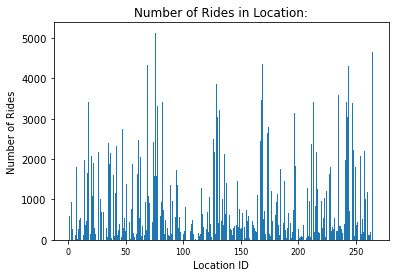

In [17]:
ArrayColumn0to5 = fhv_data.loc[ArrayZerotoFive]
#print(ArrayFivetoTen)
#ArrayColumn5to10 = fhv_data.loc[ArrayFivetoTen]
ArrayColumn10to15 = fhv_data.loc[ArrayTentoFifteen]
graphRideByLocation(ArrayColumn0to5.PULocationID)
graphRideByLocation(ArrayColumn0to5.DOLocationID)
#graphRideByLocation(ArrayColumn5to10.PULocationID)
graphRideByLocation(ArrayColumn10to15.DOLocationID)

In [23]:
fhv_data.head(5)

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,Zone,time_of_ride,pickup_day,pickup_hour,dropoff_day,dropoff_hour,time_of_ride_minutes,pickup_weekday
0,B00009,2019-12-01 00:47:00,2019-12-01 00:52:00,264,264,NV,00:05:00,1,0,1,0,5.000000,Sunday
1,B00009,2019-12-01 00:27:00,2019-12-01 00:44:00,264,264,NV,00:17:00,1,0,1,0,17.000000,Sunday
2,B00014,2019-12-01 00:42:18,2019-12-01 01:31:31,264,264,NV,00:49:13,1,0,1,1,49.216667,Sunday
3,B00014,2019-12-01 00:43:08,2019-12-01 01:07:38,264,264,NV,00:24:30,1,0,1,1,24.500000,Sunday
4,B00021,2019-12-01 00:52:19,2019-12-01 00:59:39,56,56,Corona,00:07:20,1,0,1,0,7.333333,Sunday


{'Sunday': 178666, 'Monday': 235362, 'Tuesday': 236610, 'Wednesday': 186184, 'Thursday': 195886, 'Friday': 193863, 'Saturday': 158942}


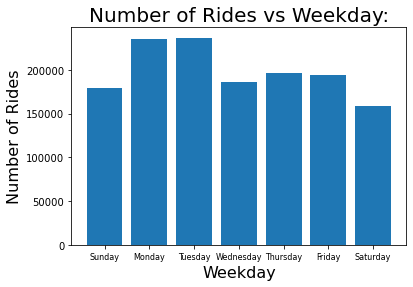

{}


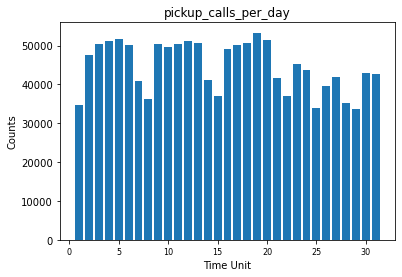

{7: 78262, 8: 93132, 9: 96515, 10: 92432, 11: 84765, 12: 84411, 13: 82938, 14: 79980, 15: 74070, 16: 66889, 17: 62180}


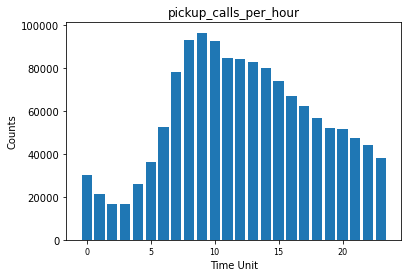

{}


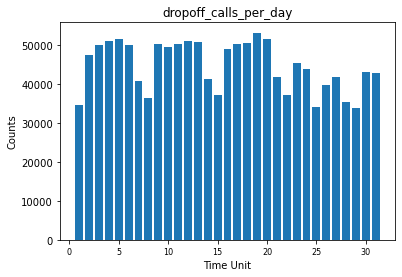

{7: 67498, 8: 88350, 18: 62285, 10: 93739, 12: 83748, 15: 75461, 16: 68770, 9: 97434, 11: 85115, 13: 81464, 14: 79001, 17: 64745}


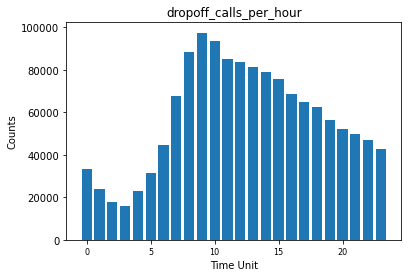

In [28]:
#Top5: {'Saint George/New Brighton': 9316, 'Jackson Heights': 10710, nan: 9247, 'Astoria': 9121, 'Flushing': 8906}
#'NV': 1385513,
fhv_data_NV = fhv_data[fhv_data.Zone == 'NV']
graphWeekday(fhv_data_NV.pickup_weekday)
countperday(fhv_data_NV.pickup_day, 'pickup_calls_per_day')
countperday(fhv_data_NV.pickup_hour,'pickup_calls_per_hour')
countperday(fhv_data_NV.dropoff_day, 'dropoff_calls_per_day')
countperday(fhv_data_NV.dropoff_hour, 'dropoff_calls_per_hour')

In [19]:
fhv_data.time_of_ride.describe()

count                    1759399
mean      0 days 01:25:26.736175
std      28 days 01:28:04.182326
min              0 days 00:00:01
25%              0 days 00:08:00
50%              0 days 00:15:31
75%              0 days 00:30:04
max          26298 days 00:30:00
Name: time_of_ride, dtype: object

In [20]:
countOfDayCalls = fhv_data.nunique()

{2: 61618, 3: 65556, 4: 67661, 5: 67873, 6: 65747, 9: 66010, 10: 65185, 11: 66628, 12: 67804, 13: 66632, 16: 64328, 17: 66184, 18: 66893, 19: 69606, 20: 65871}


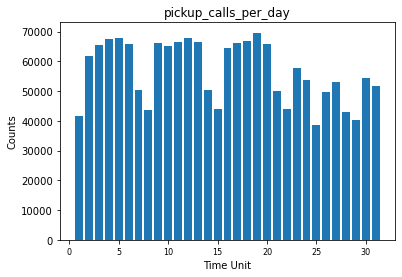

{6: 65173, 7: 99084, 8: 119745, 9: 126021, 10: 120917, 11: 111217, 12: 110906, 13: 108814, 14: 103340, 15: 94519, 16: 84737, 17: 78267, 18: 69639, 19: 62787, 20: 63582}


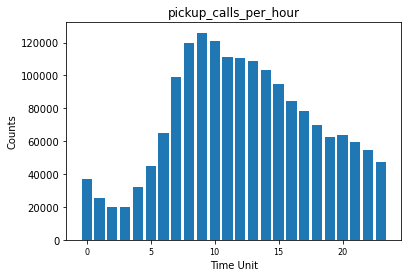

{2: 61442, 18: 66804, 5: 67658, 13: 66681, 9: 65741, 11: 66433, 4: 67500, 10: 65116, 3: 65362, 19: 69448, 20: 66137, 6: 65731, 17: 66133, 16: 64200, 12: 67603}


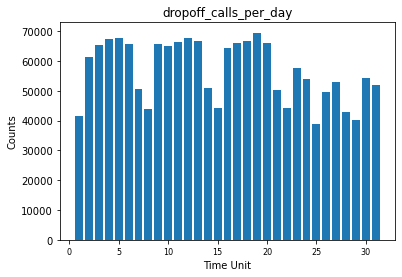

{7: 83878, 8: 113591, 18: 77740, 10: 122704, 12: 110416, 15: 96390, 16: 87461, 9: 126908, 11: 111384, 13: 107405, 19: 68741, 14: 102538, 17: 81479, 20: 63633, 21: 62058}


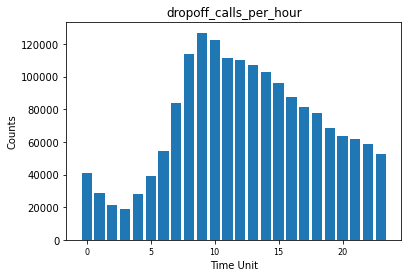

In [21]:
def countperday(data, name):
    title = name
    name = {}
    for item in data:
        if item not in name:
            name[item] = 1
        else:
            name[item] += 1
    #print(name)
    high_name = {}
    for key in name:
        if name[key] > 60000:
            high_name[key] = name[key]
    print(high_name)
    plt.bar(*zip(*name.items()))
    plt.title(title)
    plt.xlabel('Time Unit')
    plt.ylabel('Counts')
    plt.show()
    
countperday(fhv_data.pickup_day, 'pickup_calls_per_day')
countperday(fhv_data.pickup_hour,'pickup_calls_per_hour')
countperday(fhv_data.dropoff_day, 'dropoff_calls_per_day')
countperday(fhv_data.dropoff_hour, 'dropoff_calls_per_hour')


{0: 36871, 1: 25445, 2: 19996, 3: 20161, 4: 32049, 5: 44723, 6: 65173, 7: 99084, 8: 119745, 9: 126021, 10: 120917, 11: 111217, 12: 110906, 13: 108814, 14: 103340, 15: 94519, 16: 84737, 17: 78267, 18: 69639, 19: 62787, 20: 63582, 21: 59429, 22: 54870, 23: 47107}
Filtered Dictionary : 
{}


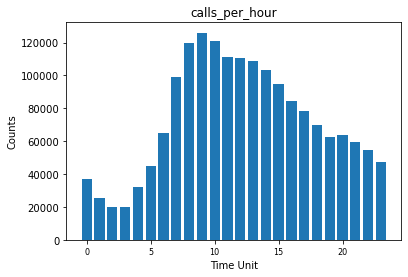

In [22]:
def specialcountperday(data, name):
    title = name
    name = {}
    for item in data:
        if item not in name:
            name[item] = 1
        else:
            name[item] += 1
    print(name)
    newDict = dict(filter(lambda elem: elem[0] >= 60000, name.items()))
    print('Filtered Dictionary : ')
    print(newDict)
    plt.bar(*zip(*name.items()))
    plt.title(title)
    plt.xlabel('Time Unit')
    plt.ylabel('Counts')
    plt.show()

specialcountperday(fhv_data.pickup_hour,'calls_per_hour')

In [ ]:
print('Look for dtypes: \n')
print(fhv_data.dtypes)

print('\nLook for total NaN\'s: \n')
print(fhv_data.isnull().sum(axis=0))

In [ ]:
fhv_data_columns = fhv_data.columns
print('Columns:', fhv_data_columns)

#Countplot for all columns:
fhv_data_columns_countplot = fhv_data_columns.drop(['pickup_datetime','dropoff_datetime'])

for column in fhv_data_columns_countplot:
    print('Value Counts:', fhv_data[column].value_counts())
    sns.countplot(fhv_data[column])
    plt.show()